# WE airline cancellation notebook

In [1]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
# File path
file_path = '/content/drive/MyDrive/flight cancellation/Flight Cancellation/flights.csv'

# Read the CSV file into DataFrame
df = pd.read_csv(file_path)
df.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,DISTANCE
0,1,1,MQ,3303,N678MQ,DFW,GJT,133.0,0,NaN,0.0,0.0,22.0,22.0,0.0,773
1,1,1,NK,295,N521NK,ORD,IAH,167.0,0,NaN,26.0,0.0,0.0,0.0,0.0,925
2,1,1,OO,2610,N866AS,LAX,FAT,55.0,0,NaN,NaN,NaN,NaN,NaN,NaN,209
3,1,1,OO,5343,N584SW,LAX,SBP,59.0,0,NaN,NaN,NaN,NaN,NaN,NaN,156
4,1,1,OO,4443,N455SW,CVG,MKE,83.0,0,NaN,NaN,NaN,NaN,NaN,NaN,318


In [3]:
# Get statistical summary of the DataFrame
print(df.describe())

               MONTH            DAY  FLIGHT_NUMBER  SCHEDULED_TIME  \
count  581746.000000  581746.000000  581746.000000   581742.000000   
mean        6.523995      15.704655    1998.553611      143.450653   
std         3.405153       8.783496    1690.845565       84.090208   
min         1.000000       1.000000       2.000000       30.000000   
25%         4.000000       8.000000     678.000000       80.000000   
50%         7.000000      16.000000    1529.000000      115.000000   
75%         9.000000      23.000000    2766.000000      177.000000   
max        12.000000      31.000000    8410.000000      587.000000   

       Flight_Status  AIR_SYSTEM_DELAY  SECURITY_DELAY  AIRLINE_DELAY  \
count  581746.000000     136064.000000   136064.000000  136064.000000   
mean        0.018888          8.554636        0.085497      16.977342   
std         0.136130         19.767298        2.203511      37.029555   
min         0.000000          0.000000        0.000000       0.000000   
25% 

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the sum of the delay time for each row
df['total_delay_time'] = df[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)

#Drop the original 5 delay columns
df.drop(columns=['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY', 'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'], inplace=True)
df.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,DISTANCE,total_delay_time
0,1,1,MQ,3303,N678MQ,DFW,GJT,133.0,0,NaN,773,44.0
1,1,1,NK,295,N521NK,ORD,IAH,167.0,0,NaN,925,26.0
2,1,1,OO,2610,N866AS,LAX,FAT,55.0,0,NaN,209,0.0
3,1,1,OO,5343,N584SW,LAX,SBP,59.0,0,NaN,156,0.0
4,1,1,OO,4443,N455SW,CVG,MKE,83.0,0,NaN,318,0.0


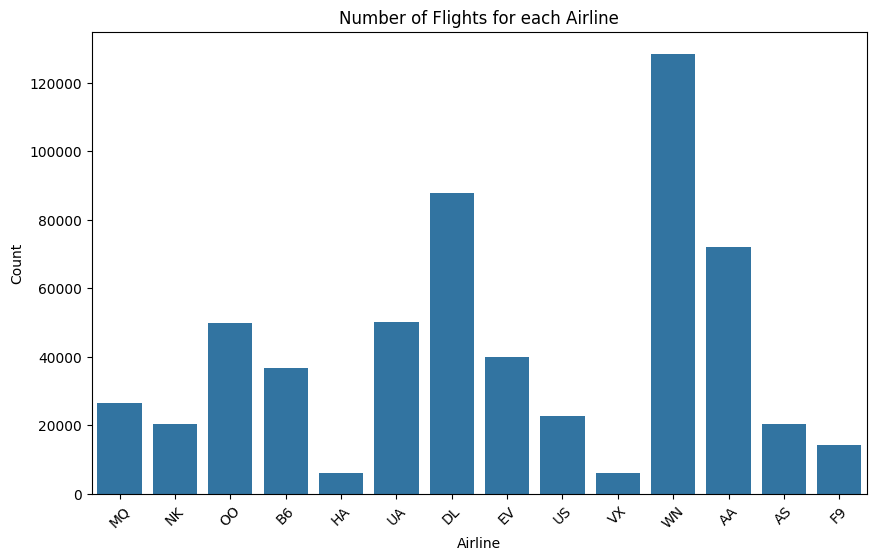

In [5]:
# Plot a bar plot of categorical data ('AIRLINE')
plt.figure(figsize=(10, 6))
sns.countplot(x='AIRLINE', data=df)
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Number of Flights for each Airline')
plt.xticks(rotation=45)
plt.show()

# Finding the Total Cancelled Flights for Each Airline and sorting them

In [6]:
# Group by 'AIRLINE' and aggregate the sum of 'Flight_Status'
cancel = df.groupby('AIRLINE')['Flight_Status'].sum()

print(cancel.sort_values(ascending=False))


AIRLINE
WN    2145
EV    1800
MQ    1673
OO    1409
AA    1127
UA     650
B6     644
US     477
NK     425
DL     396
F9      94
AS      87
VX      48
HA      13
Name: Flight_Status, dtype: int64


Count of cancelled flights: 10988
Count of successful flights: 570758


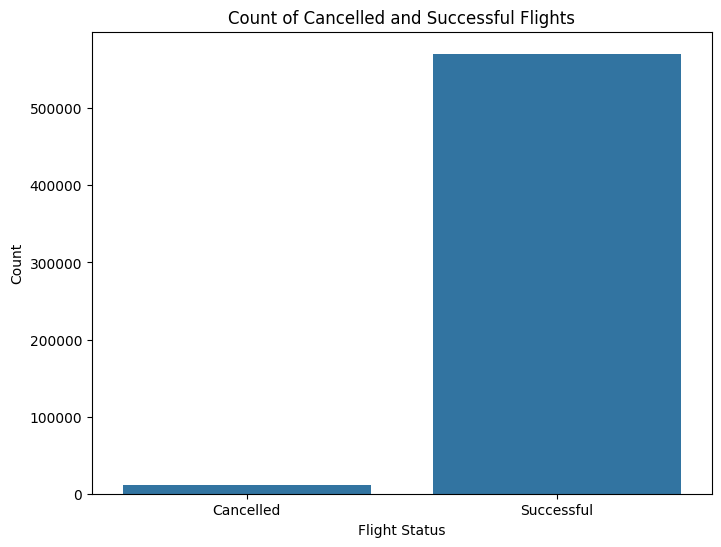

In [7]:
# Count when 'Flight_Status' is equal to 1 and 0
flight_status_count = (df['Flight_Status'] == 1).sum()
successful_flights_count = (df['Flight_Status'] == 0).sum()

print("Count of cancelled flights:", flight_status_count)
print("Count of successful flights:", successful_flights_count)

# Create a bar plot to visualize the counts
plt.figure(figsize=(8, 6))
sns.barplot(x=['Cancelled', 'Successful'], y=[flight_status_count, successful_flights_count])
plt.xlabel('Flight Status')
plt.ylabel('Count')
plt.title('Count of Cancelled and Successful Flights')
plt.show()


## print each Airline name and the airline code from airline.csv

In [8]:
# Read 'airlines.csv' into a pandas DataFrame
airlines_df = pd.read_csv('/content/drive/MyDrive/flight cancellation/Flight Cancellation/airlines.csv')
airlines_df.head()

,IATA_CODE,AIRLINE
0,UA,United Air Lines Inc.
1,AA,American Airlines Inc.
2,US,US Airways Inc.
3,F9,Frontier Airlines Inc.
4,B6,JetBlue Airways


#exploring dataypes and nulls of the Dataframe

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581746 entries, 0 to 581745
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   MONTH                581746 non-null  int64  
 1   DAY                  581746 non-null  int64  
 2   AIRLINE              581746 non-null  object 
 3   FLIGHT_NUMBER        581746 non-null  int64  
 4   TAIL_NUMBER          580318 non-null  object 
 5   ORIGIN_AIRPORT       581746 non-null  object 
 6   DESTINATION_AIRPORT  581746 non-null  object 
 7   SCHEDULED_TIME       581742 non-null  float64
 8   Flight_Status        581746 non-null  int64  
 9   CANCELLATION_REASON  10988 non-null   object 
 10  DISTANCE             581746 non-null  int64  
 11  total_delay_time     581746 non-null  float64
dtypes: float64(2), int64(5), object(5)
memory usage: 53.3+ MB


#Preprocessing the AIRLINE Column
#by Encoding it and handling if any unseen categories in test appeared it will automatically assign a new label to it.

In [10]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
import joblib

# Assuming you have the 'df' DataFrame with the 'AIRLINE' column

# Initialize the OrdinalEncoder
AIRLINE_ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=14)

# Fit and transform the 'AIRLINE' column
df['AIRLINE'] = AIRLINE_ordinal_encoder.fit_transform(df[['AIRLINE']])

# Save the OrdinalEncoder object to a file using joblib
joblib.dump(AIRLINE_ordinal_encoder, 'AIRLINE_ordinal_encoder.pkl')

df.head()


,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,DISTANCE,total_delay_time
0,1,1,7.0,3303,N678MQ,DFW,GJT,133.0,0,NaN,773,44.0
1,1,1,8.0,295,N521NK,ORD,IAH,167.0,0,NaN,925,26.0
2,1,1,9.0,2610,N866AS,LAX,FAT,55.0,0,NaN,209,0.0
3,1,1,9.0,5343,N584SW,LAX,SBP,59.0,0,NaN,156,0.0
4,1,1,9.0,4443,N455SW,CVG,MKE,83.0,0,NaN,318,0.0


# Encoding for airports

In [11]:
# Initialize the OrdinalEncoder
ORIGIN_AIRPORT_ordinal_encoder = OrdinalEncoder()
DESTINATION_AIRPORT_ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'ORIGIN_AIRPORT' and 'DESTINATION_AIRPORT' columns
df['ORIGIN_AIRPORT'] = ORIGIN_AIRPORT_ordinal_encoder.fit_transform(df[['ORIGIN_AIRPORT']])
df['DESTINATION_AIRPORT'] = DESTINATION_AIRPORT_ordinal_encoder.fit_transform(df[['DESTINATION_AIRPORT']])

# Save the OrdinalEncoder objects to files using joblib
joblib.dump(ORIGIN_AIRPORT_ordinal_encoder, 'ORIGIN_AIRPORT_ordinal_encoder.pkl')
joblib.dump(DESTINATION_AIRPORT_ordinal_encoder, 'DESTINATION_AIRPORT_ordinal_encoder.pkl')

df.head()


,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,DISTANCE,total_delay_time
0,1,1,7.0,3303,N678MQ,173.0,385.0,133.0,0,NaN,773,44.0
1,1,1,8.0,295,N521NK,259.0,408.0,167.0,0,NaN,925,26.0
2,1,1,9.0,2610,N866AS,220.0,371.0,55.0,0,NaN,209,0.0
3,1,1,9.0,5343,N584SW,220.0,521.0,59.0,0,NaN,156,0.0
4,1,1,9.0,4443,N455SW,168.0,460.0,83.0,0,NaN,318,0.0


#Encoding the TAIL_NUMBER Column

In [12]:
# Initialize the OrdinalEncoder
TAIL_NUMBER_ordinal_encoder = OrdinalEncoder()

# Fit and transform the 'TAIL_NUMBER' column
df['TAIL_NUMBER'] = TAIL_NUMBER_ordinal_encoder.fit_transform(df[['TAIL_NUMBER']])

# Save the OrdinalEncoder object to a file using joblib
joblib.dump(TAIL_NUMBER_ordinal_encoder, 'TAIL_NUMBER_ordinal_encoder.pkl')

df.head()

,MONTH,DAY,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,Flight_Status,CANCELLATION_REASON,DISTANCE,total_delay_time
0,1,1,7.0,3303,2955.0,173.0,385.0,133.0,0,NaN,773,44.0
1,1,1,8.0,295,2033.0,259.0,408.0,167.0,0,NaN,925,26.0
2,1,1,9.0,2610,4020.0,220.0,371.0,55.0,0,NaN,209,0.0
3,1,1,9.0,5343,2348.0,220.0,521.0,59.0,0,NaN,156,0.0
4,1,1,9.0,4443,1713.0,168.0,460.0,83.0,0,NaN,318,0.0


In [13]:
#dropping cancellation reason
df.drop(columns=['CANCELLATION_REASON'], inplace=True)

In [14]:
# replacing all NaN values with the mean of the attribute in which they are present
df=df.fillna(df.mean())

In [15]:
df.value_counts('Flight_Status')

,count
Flight_Status,
0,570758
1,10988


## Dealing With Class Imbalance

Based on the provided data imbalance, we can use a combination of downsampling the majority class and upsampling the minority class to create a more balanced dataset. We can use the `RandomUnderSampler` and `SMOTE` from the `imblearn` library to achieve this.



In [16]:
from imblearn.over_sampling import SMOTE

# Assuming you have the 'df' DataFrame with the 'Flight_Status' column

# Separate the features (X) and the target ('Flight_Status')
X = df.drop(columns=['Flight_Status'])
y = df['Flight_Status']

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to create synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new balanced DataFrame
balanced_df = pd.concat([pd.DataFrame(X_resampled), pd.Series(y_resampled, name='Flight_Status')], axis=1)


In [17]:
balanced_df.value_counts('Flight_Status')

,count
Flight_Status,
0,570758
1,570758


In [18]:
from sklearn.model_selection import train_test_split

# Assuming you have the 'balanced_df' DataFrame with the balanced representation of 'Flight_Status'

# Separate the features (X) and the target ('Flight_Status')
X = balanced_df.drop(columns=['Flight_Status'])
y = balanced_df['Flight_Status']

# Split the data into 80/20 ratio for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

In [19]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
scaler = ss.fit(X_train)
trainX_scaled = scaler.transform(X_train)
testX_scaled = scaler.transform(X_test)

In [20]:
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename)

['scaler.save']

#Training and Testing the models

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: Train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Step 4: Evaluate the model's performance using accuracy score
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Accuracy Score: 0.9865267362814493


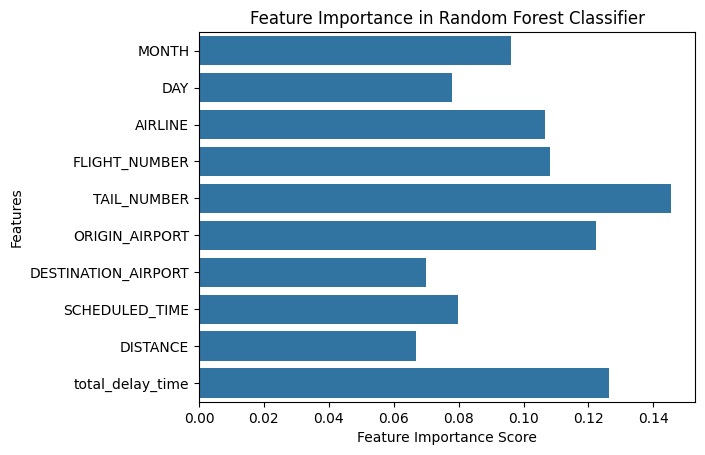

In [22]:
# Step 5: Visualize the feature importances (Optional for Random Forest)
feature_importances = pd.Series(rf_classifier.feature_importances_, index=X_train.columns)
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance in Random Forest Classifier')
plt.show()

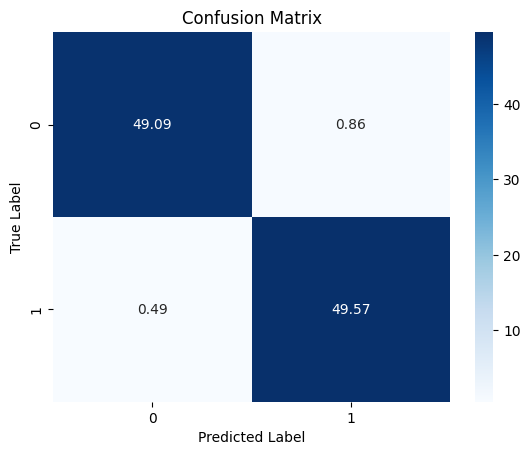

In [23]:
# Step 6: Print the confusion matrix using the library
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the total number of instances
total_instances = sum(sum(conf_matrix))

# Calculate the percentages
conf_matrix_percent = conf_matrix / total_instances * 100

# Create the heatmap with percentages
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [24]:
# Step 7: Save the model using joblib
model_filename = 'random_forest_model_best.pkl'
joblib.dump(rf_classifier, model_filename)
print("Model saved successfully as", model_filename)

Model saved successfully as random_forest_model_best.pkl


XGBoost Accuracy Score: 0.9230762492115775


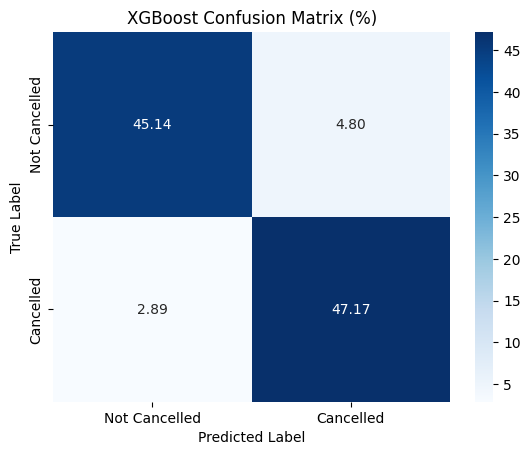

Model saved successfully as xgboost_flight_model.pkl


In [25]:
from xgboost import XGBClassifier

# Step 1: Train the XGBoost classifier
xgb_classifier = XGBClassifier(eval_metric='logloss', random_state=45)
xgb_classifier.fit(X_train, y_train)

# Step 2: Predict on test data
y_pred = xgb_classifier.predict(X_test)

# Step 3: Evaluate model with accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("XGBoost Accuracy Score:", accuracy)

# Step 4: Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Step 5: Convert confusion matrix to percentages
total_instances = conf_matrix.sum()
conf_matrix_percent = conf_matrix / total_instances * 100

# Step 6: Plot the confusion matrix
sns.heatmap(conf_matrix_percent, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['Not Cancelled', 'Cancelled'],
            yticklabels=['Not Cancelled', 'Cancelled'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('XGBoost Confusion Matrix (%)')
plt.show()

# Step 7: Save the model
model_filename = 'xgboost_flight_model.pkl'
joblib.dump(xgb_classifier, model_filename)
print("Model saved successfully as", model_filename)
